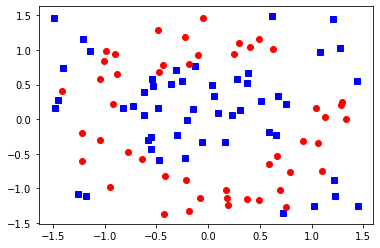

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# dataset 1
np.random.seed(123)
n = 100
x_d1 = 3 * (np.random.rand(n, 2) - 0.5)
radius = x_d1[:,0]**2 + x_d1[:,1]**2
y_d1 = (radius > 0.7 + 0.1 * np.random.randn(n)) & ( radius < 2.2 + 0.1 * np.random.randn(n))
y_d1 = 2 * y_d1 - 1

plt.plot(x_d1[y_d1 < 0, 0],  x_d1[y_d1 < 0, 1], 'bs')
plt.plot(x_d1[y_d1 > 0, 0],  x_d1[y_d1 > 0, 1], 'ro')

In [121]:
def kernel(xi, xj, alpha=1):
    return np.exp(-alpha*np.sum((xi[0] - xj[0])**2 + (xi[1] - xj[1])**2))

def loss_func(X,y,alpha):
    sum = 0
    for i in range(len(X)):
        for j in range(len(X)):
            sum += alpha[i]*alpha[j]*y[i]*y[j]*kernel(X[i],X[j])
            
    return np.sum(alpha) - sum/2

def direction(X,y,i,alpha):
    sum = 0
    for j in range(len(X)):
        sum += alpha[j]*alpha[j]*y[i]*y[j]*kernel(X[i],X[j])
    return 1 - sum

loss_hist_batch = []
alpha_hist = []
epochs = 30
n = len(x_d1)
lr = 0.05
alpha = np.zeros(n)
direct = np.zeros(n)
for t in range(epochs):
    alpha_hist.append(alpha)
    for i in range(n):
        direct = direction(x_d1,y_d1,i,alpha)
    loss = loss_func(x_d1,y_d1,alpha)
    loss_hist_batch.append(loss)
    alpha += lr * direct

loss_max_index = np.argmax(loss_hist_batch)
alpha = alpha_hist[loss_max_index]

10


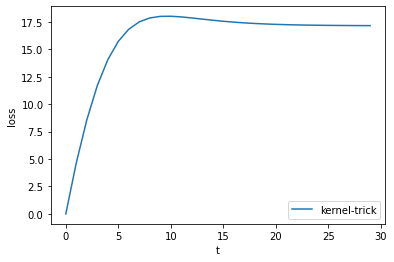

In [122]:
plt.plot((np.abs(loss_hist_batch)),label='kernel-trick')
plt.legend()
plt.xlabel('t')
plt.ylabel('loss')
print(loss_max_index)

In [123]:
def classsifier(X,x,y,alpha):
    y_x = 0
    for i in range(n):
        y_x += alpha[i]*y[i]*kernel(X[i],x)
    
    return y_x

In [124]:
total = n
correct = 0
y_pred = np.zeros(n)
for i in range(n):
    y_pred[i] = classsifier(x_d1,x_d1[i],y_d1,alpha)
    if y_pred[i] > 0:
        y_pred[i] = 1
    elif y_pred[i] < 0:
        y_pred[i] = -1
    
    if y_pred[i] == y_d1[i]:
        correct += 1
print(correct/total)

0.67


In [29]:
#w.t*x = 0 w1*x1 + w2*x2 = 0 x2 = -w1/w2 * x1
#w.t*x = 1
#w.t*x = -1

x_g = np.arange(-1.5,1.5,0.01)
#y_g = -w[0]/w[1]

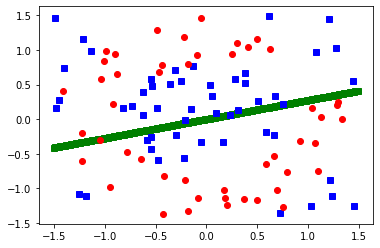

In [30]:
plt.plot(x_g,  y_g, 'gs')
plt.plot(x_d1[y_d1 < 0, 0],  x_d1[y_d1 < 0, 1], 'bs')
plt.plot(x_d1[y_d1 > 0, 0],  x_d1[y_d1 > 0, 1], 'ro')